In [ ]:
#Installing the libraries.

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the dataset.

In [4]:
data = pd.read_csv(r"C:\Users\Imtiaz\Downloads\archive (5)\insurance.csv")

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 1296x576 with 0 Axes>

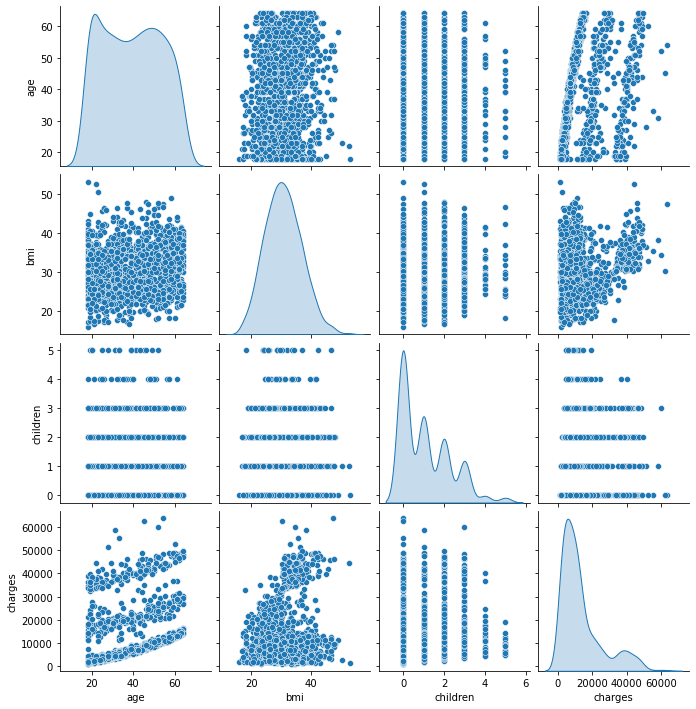

In [9]:
plt.figure(figsize = (18, 8))
sns.pairplot(data=data, diag_kind = 'kde')

In [10]:
#let's visualize the ages of the members.

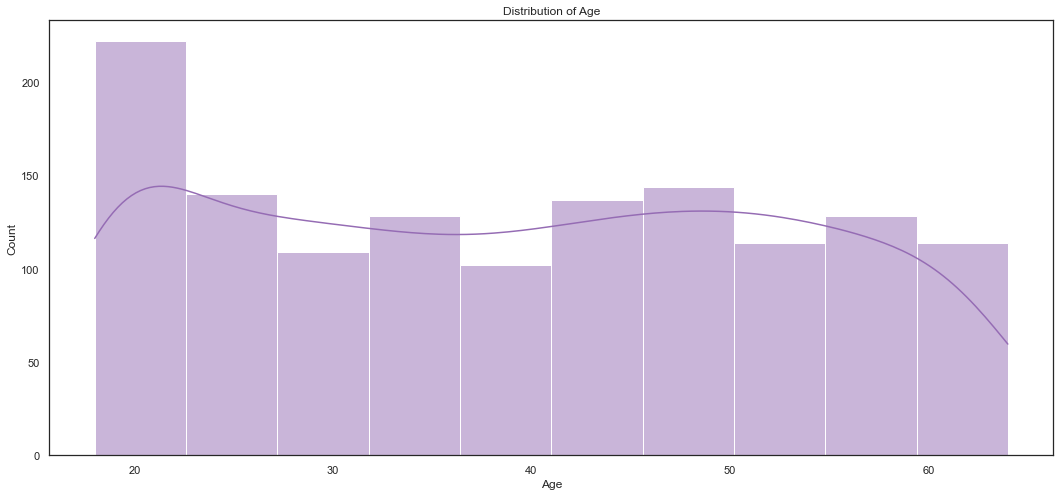

In [11]:
plt.figure(figsize = (18, 8))
sns.set(style="white", palette="muted", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 5)
sns.histplot(data['age'], bins = 10, color = 'm', kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
#Let's see the relationship between Age and Charges using a Scatterplot and a Bar graph.

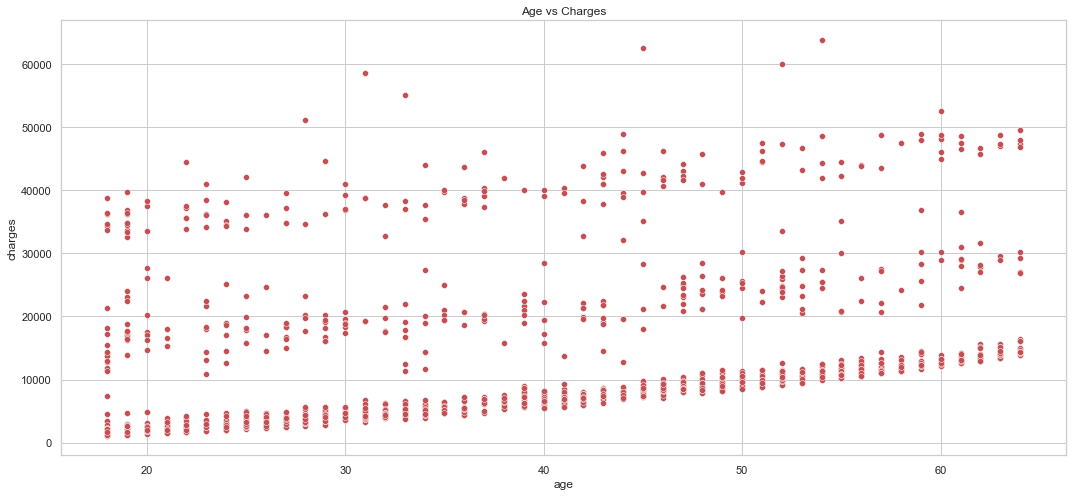

In [13]:
plt.figure(figsize = (18, 8))
sns.set(style="whitegrid")
sns.scatterplot(x= data['age'] , y= data['charges'], color = 'r')
plt.title("Age vs Charges")
plt.show()

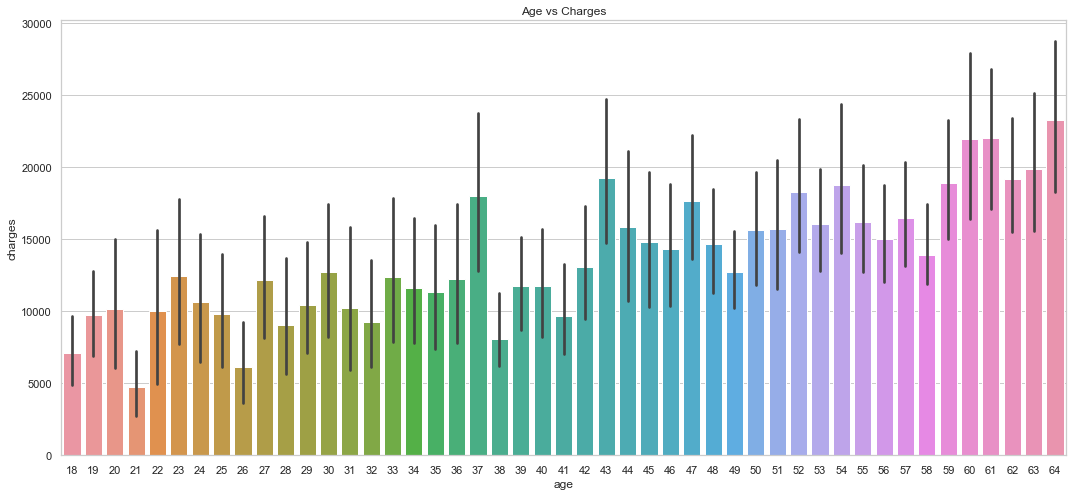

In [14]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'age', y = 'charges', data = data)
plt.title("Age vs Charges")
plt.show()

As expected, as Age increases , health insurance charges increase. There are three distinct cohort members- lowcost, middle cost and high cost members.

C:\Users\Imtiaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


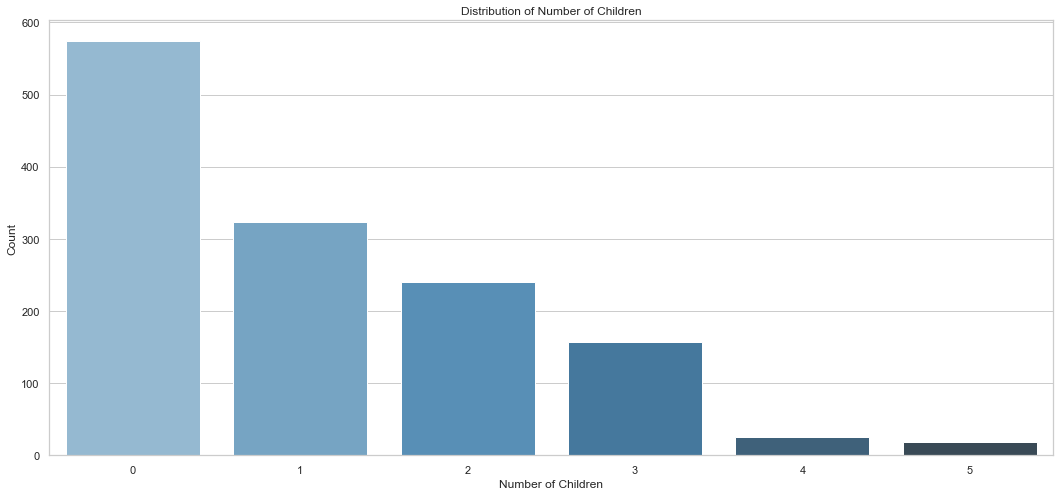

In [15]:
plt.figure(figsize = (18, 8))
sns.countplot(data['children'], palette = 'Blues_d').set_title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

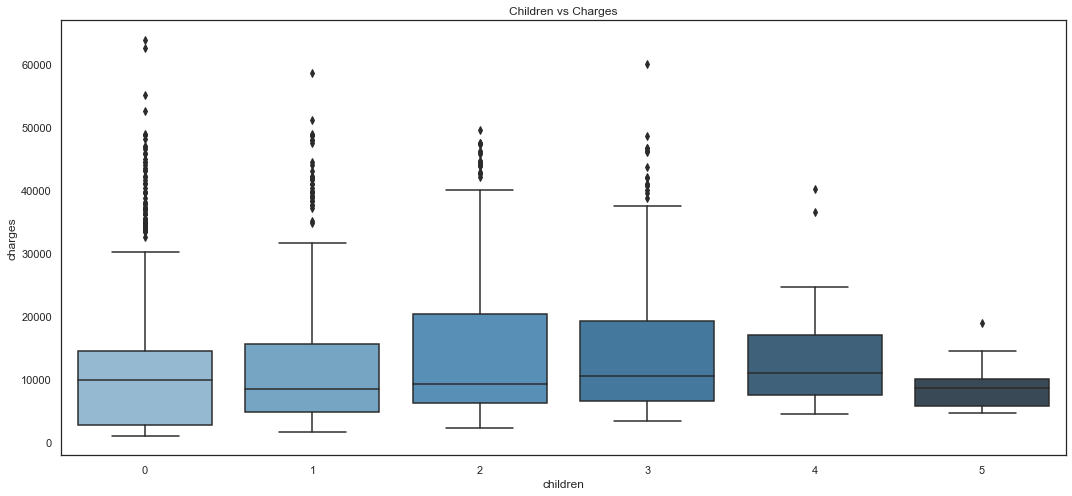

In [16]:
sns.set_style("white")
plt.figure(figsize = (18, 8))
sns.boxplot(x = 'children', y = 'charges', data = data, palette ='Blues_d')
plt.title('Children vs Charges')
plt.show()

#The number of children a member has an interesting impact on charges. Those wo have 0-1 or 4-5 children  have less charges than those who have 2-3 children.

In [17]:
# Let's have a look at number of male vs female members.

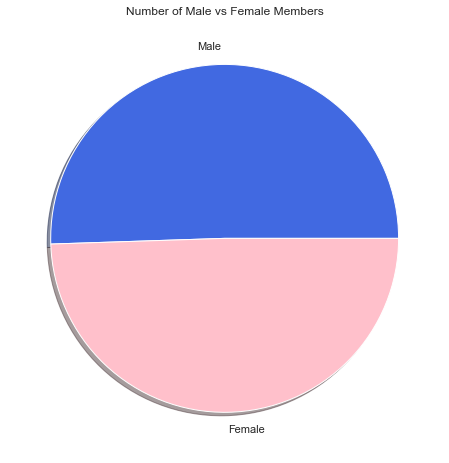

In [18]:
colors = ['royalblue', 'pink']
labels = "Male", "Female"
size = (data['sex'].value_counts())
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, data = data, colors = colors, labels = labels, shadow = True)
plt.title('Number of Male vs Female Members')
plt.show()

In [ ]:
#Let's have a look at  sex vs charges using a violinplot.

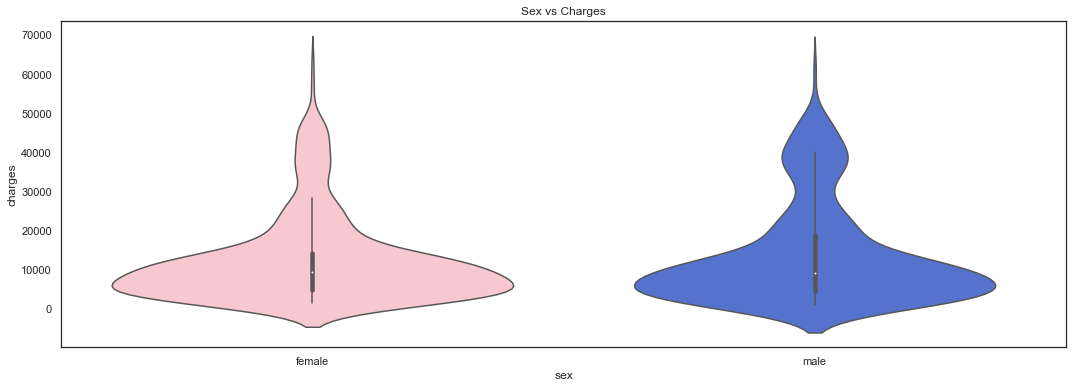

In [20]:
sns.set_style("white")
colors = ['pink', 'royalblue']
plt.figure(figsize = (18, 6))
sns.violinplot(x = 'sex', y = 'charges', data = data, palette = colors, orient = 'v')
plt.title('Sex vs Charges')
plt.show()

In [ ]:
#From the violinplot, we see that males have a higher number of higher costs than females.

In [ ]:
#Now we will plot a scatterplot to see how age affects charges, color by gender.

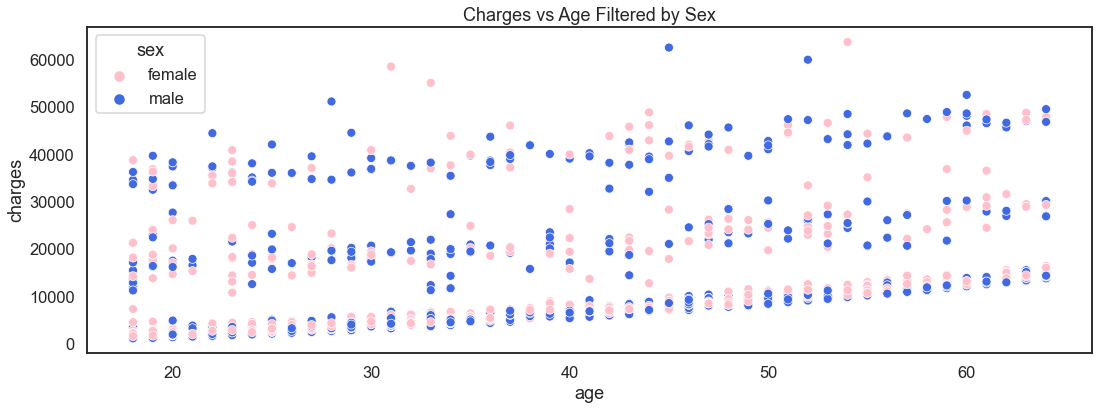

In [21]:
sns.set_context('talk')
sns.set_style("white")
plt.figure(figsize = (18, 6))
colors = ['pink', 'royalblue']
sns.scatterplot(x='age' , y='charges', hue='sex', palette = colors, data=data).set_title('Charges vs Age Filtered by Sex')
plt.show()

In [ ]:
#It's difficult to see any significant relationship here. Now let's see how many members smoke, and then perform similar 
#analysis by smoking status.

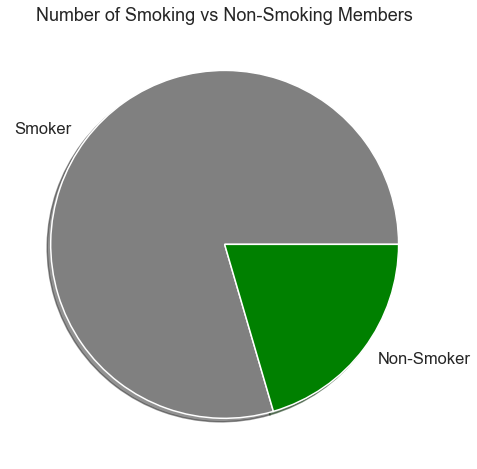

In [22]:
colors = ['gray', 'green']
labels = "Smoker", "Non-Smoker"
size = (data['smoker'].value_counts())
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True)
plt.title('Number of Smoking vs Non-Smoking Members')
plt.show()

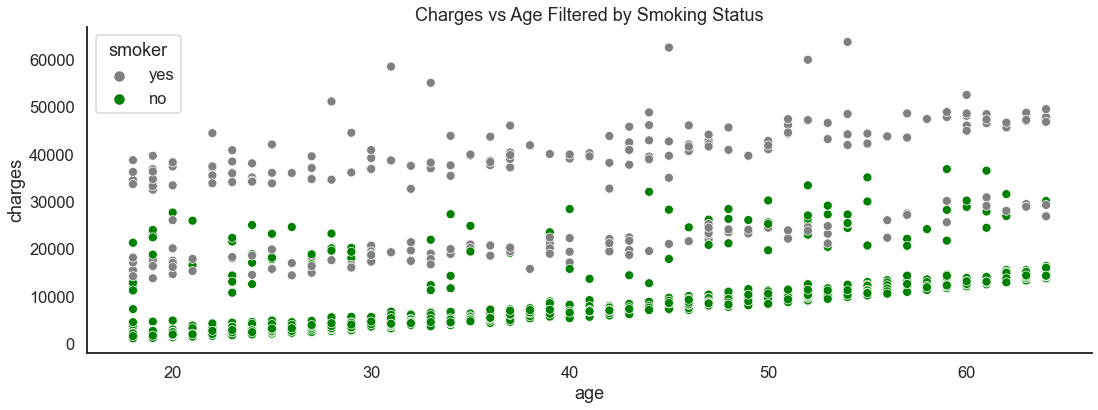

In [23]:
colors = ['gray', 'green']
plt.figure(figsize = (18, 6))
sns.scatterplot(x= 'age' , y= 'charges', hue='smoker', palette = colors, data=data).set_title('Charges vs Age Filtered by Smoking Status')
sns.despine()

In [ ]:
#Smokers seems to have higher average charges than non-smokers, independent of age. Let's have a look at how  BMI affects this.

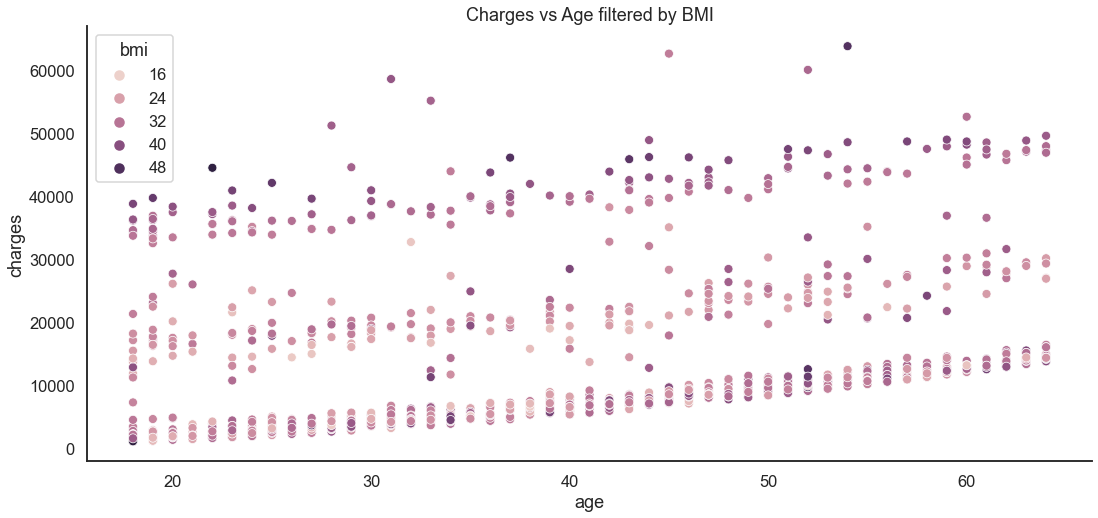

In [25]:

plt.figure(figsize = (18, 8))
sns.scatterplot(x= 'age' , y= 'charges', hue = 'bmi', data=data).set_title('Charges vs Age filtered by BMI')
sns.despine()

In [ ]:
#Memebers with higher BMIs experience higher charges independent of age. Let's have a look at effects of being a smoker and having a high BMI.

Let's create new variable "BMI smoker".We will define "high BMI" to be >= 30 and take a look at the head of this dataset including this newly created variable.

In [26]:
data['BMI_smoker'] = 'default'
data.loc[(data.bmi >= 30) & (data.smoker == 'yes'), 'BMI_smoker'] = 'High_BMI_smoker'
data.loc[(data.bmi >= 30) & (data.smoker == 'no'), 'BMI_smoker'] = 'High_BMI_no_smoker'
data.loc[(data.bmi < 30) & (data.smoker == 'yes'), 'BMI_smoker'] = 'Normal_BMI_smoker'
data.loc[(data.bmi < 30) & (data.smoker == 'no'), 'BMI_smoker'] = 'Normal_BMI_no_smoker'
data.head()

,age,sex,bmi,children,smoker,region,charges,BMI_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,Normal_BMI_smoker
1,18,male,33.770,1,no,southeast,1725.55230,High_BMI_no_smoker
2,28,male,33.000,3,no,southeast,4449.46200,High_BMI_no_smoker
3,33,male,22.705,0,no,northwest,21984.47061,Normal_BMI_no_smoker
4,32,male,28.880,0,no,northwest,3866.85520,Normal_BMI_no_smoker


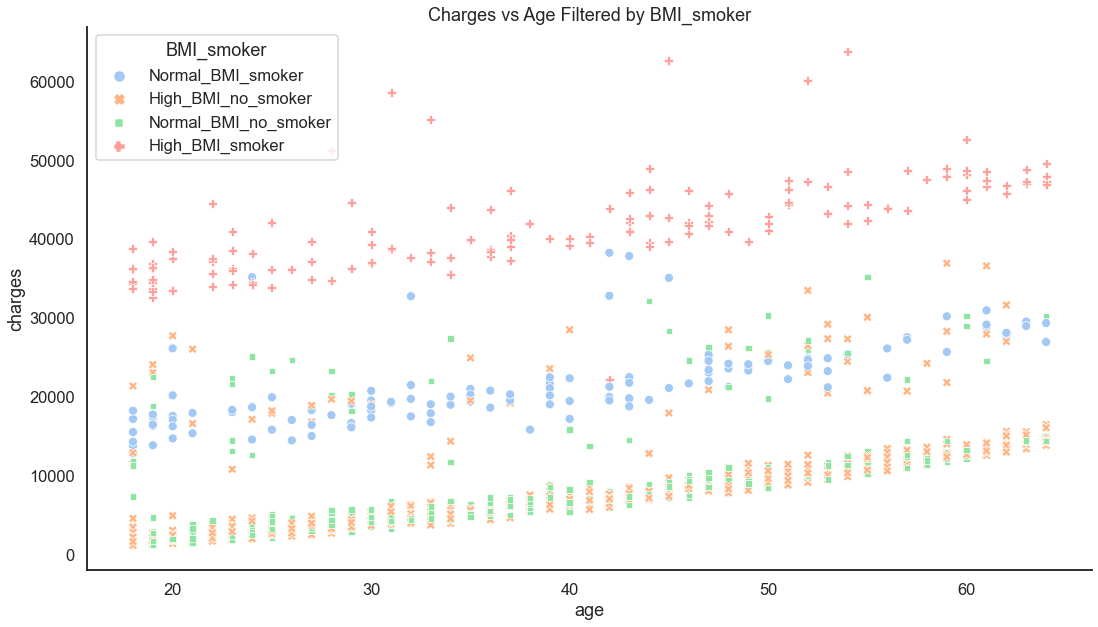

In [27]:
sns.set_context('talk')
plt.figure(figsize = (18, 10))
sns.scatterplot(x= 'age' , y= 'charges', hue='BMI_smoker', palette = 'pastel', data=data, style = 'BMI_smoker').set_title('Charges vs Age Filtered by BMI_smoker')
sns.despine()

#Clearly, being a smoker and having a high BMI is highly correlated with having high charges. If you have a high BMI, smoking is especially strongly correlated with you having high insurance claims. And inversely, if you are a smoker, a high BMI is particularly indicative of having high insurance claims.

In [ ]:
#Next we visualize the regions to where the members belong.

C:\Users\Imtiaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


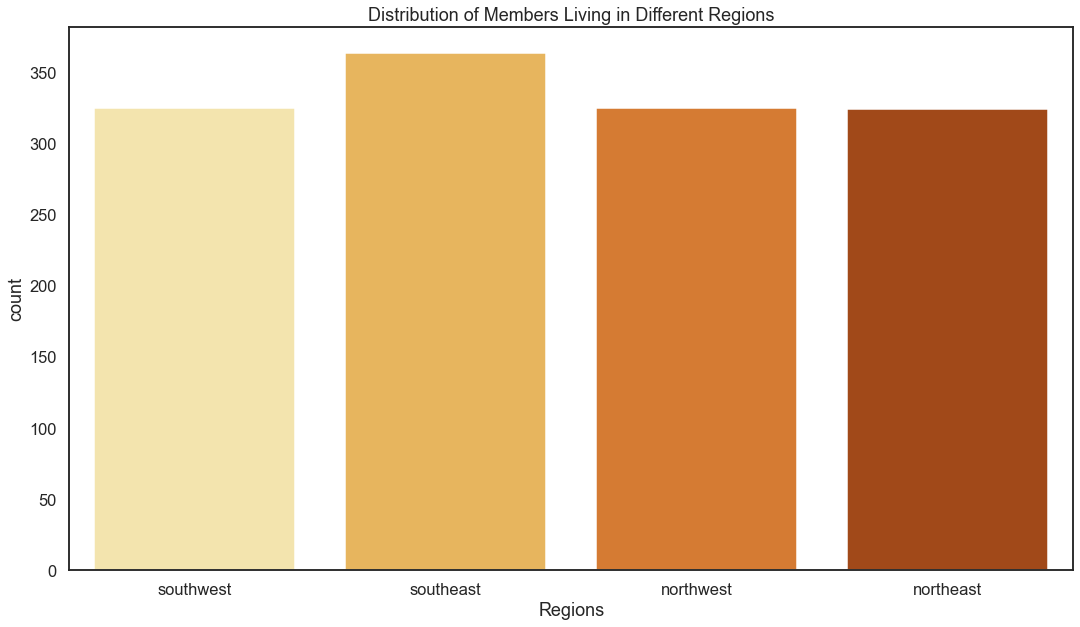

In [34]:
plt.figure(figsize = (18, 10))
sns.countplot(data['region'], palette='YlOrBr').set_title('Distribution of Members Living in Different Regions')
plt.xlabel('Regions')
plt.ylabel('count')
plt.show()

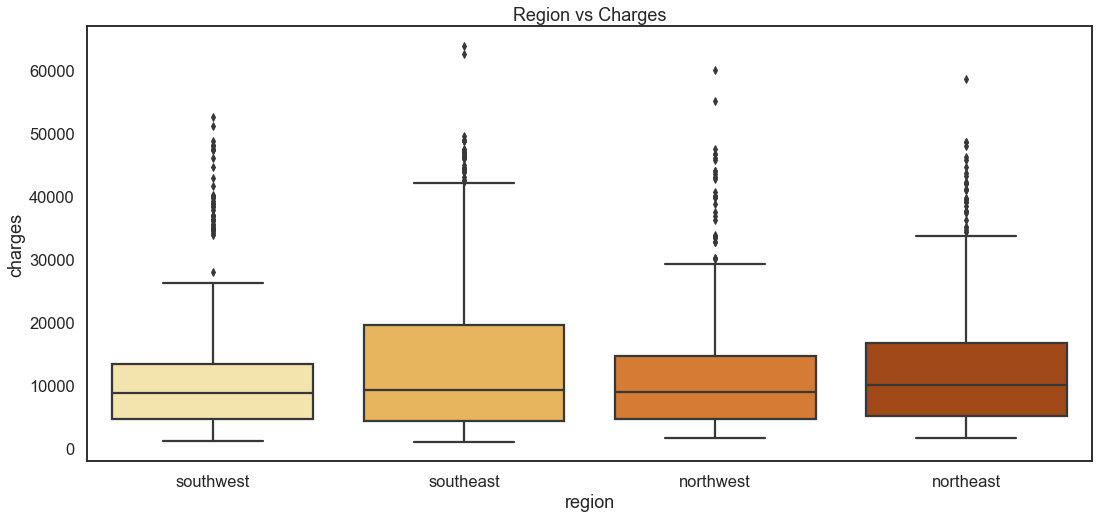

In [35]:
plt.figure(figsize = (18, 8))
sns.boxplot(x = 'region', y = 'charges', data = data, palette ='YlOrBr')
plt.title('Region vs Charges')
plt.show()

In [ ]:
#Overall, Southeast members seem to have relatively charges, but overall the effect is not so much.

In [ ]:
#Let's plot a heatmap for the dataset.We need to convert 'sex' and 'smoker' into numerical variables.

In [67]:
data['female'] = data['sex'].replace('female', 0,inplace= False)
data['male'] = data['sex'].replace('male', 1,inplace= False)
data['smoker'].replace('no', 0,inplace=True)
data['smoker'].replace('yes', 1,inplace=True)
data2 = data.copy()
data2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'BMI_smoker', 'male', 'female'],
      dtype='object')

In [68]:
data2.drop(['sex'], axis=1, inplace = True)
data2.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges', 'BMI_smoker',
       'male', 'female'],
      dtype='object')

<AxesSubplot:>

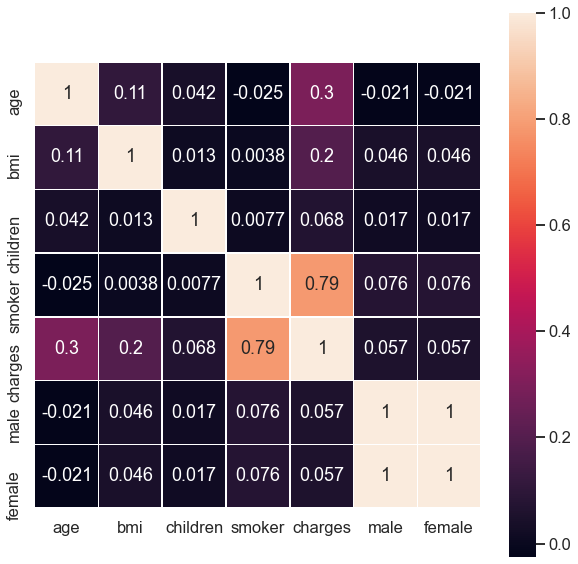

In [69]:
f, ax = plt.subplots(figsize = (10, 10))
corr = data2.corr()
ax.set_ylim(-1.5,2.5)
sns.heatmap(corr, linewidths=.5, annot=True, square = True, ax = ax)

In [ ]:
#Based on our EDA and final correlation plot, we conclude that smoking is the most correlated among these variables. Followed by 
#then age, BMI, then number of children.